In [8]:
"""
Connect senior:Mainland
"""
import pandas as pd
import json
import requests
def ssql(sql):
    admin_token = '2cebeb5c7edac5ef0d7c5a640e69fc7d43bf2cd6a24ce43dfee3dd33662c0bab'
    url = 'http://sensor.wb-intra.com/api/sql/query?token=%s&project=production' % admin_token
    data = {'q': sql, 'format': 'json'}
    req = requests.post(url,data)
    req_dec = req.content.decode()
    try:
        req_json = json.loads('[' + req_dec.replace('\n', ',')[:-1] + ']')
        df_d_id = pd.DataFrame(req_json)
        return df_d_id
    except:
        print(req_dec)

In [2]:
import numpy as np 
import pandas as pd 
# from MqQuery import MqQuery as mq
from matplotlib import pyplot as plt
import gametypeid
import random·

In [5]:
start_date = '2020-11-05'
end_date = '2020-12-05'
# query = mq()

In [6]:
sql_friend = '''select t1.date,t1.gametypeid,round(friend/players,2)rate from
(select date,case when gametypeid>=1200 and gametypeid<=1226 then 1200 
 when gametypeid >=1300 and gametypeid<=1306 then 1300 else gametypeid end as gametypeid,count(distinct distinct_id)friend from events
where event = 'addFriendNew'
and date between '{start_date}' and '{end_date}' 
and result = '0'
and gametypeid is not null
group by 1,2)t1
left join
(select date,case when gametypeid>=1200 and gametypeid<=1226 then 1200
when gametypeid >=1300 and gametypeid<=1306 then 1300 else gametypeid end as gametypeid,count(distinct distinct_id)players from events
where event = 'gameStart'
and date between '{start_date}' and '{end_date}' 
group by 1,2)t2
on t1.date = t2.date and t1.gametypeid = t2.gametypeid
order by 1,2
'''.format(start_date = start_date,end_date = end_date)

In [9]:
df_friend = ssql(sql_friend)

In [10]:
df_friend = df_friend.assign(type = df_friend.gametypeid.map(gametypeid.gametypeid))

In [12]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21451 missing from c

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21160 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21152 missing from current f

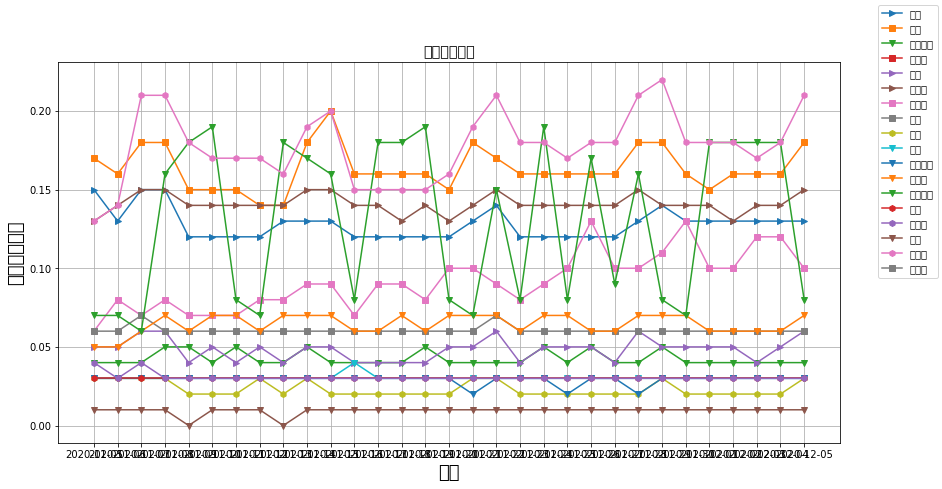

In [14]:
# plt.rcParams['font.sans-serif'] = 'SimHei'
# plt.rcParams['axes.unicode_minus'] = False
fig,ax = plt.subplots(figsize = (14,7))
ax.set_xlabel('时间',fontsize = 18)
ax.set_ylabel('主动加好友率',fontsize = 18)
ax.set_title('主动加好友率',fontsize = 'x-large')
ax.grid()
for type in df_friend.type.unique():
    ax.plot(df_friend.loc[df_friend.type==type,'date'],df_friend.loc[df_friend.type==type,'rate'],label = type,marker = random.choice(['h','v','s','>']))
fig.legend()
fig.savefig('主动加好友.png',dpi = 800,bbox_inches = 'tight')

    

In [15]:
df_friend.groupby(['type'],as_index= False).rate.mean().to_clipboard()